 # Nuclei Kaggle Project
 
 For this project I had to compile the opencv libraries from scratch to avoid the message:
 
 *error: /opt/conda/conda-bld/opencv_1491943970124/work/opencv-3.1.0/modules/highgui/src/window.cpp:545: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvShowImage
 
Uninstalling OpenCV
sudo dpkg -r opencv

Install libopencv
sudo apt-get purge libopencv*
 
 The instructions to install opencv:
 https://www.pyimagesearch.com/2016/10/24/ubuntu-16-04-how-to-install-opencv/
 
 ## Understand the type of image 
 

In [2]:
# Load son modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from IPython.display import display
import glob, os
import pickle
from keras.preprocessing import image
import tensorflow as tf
from PIL import Image

Using TensorFlow backend.


### Let us load one image and its masks

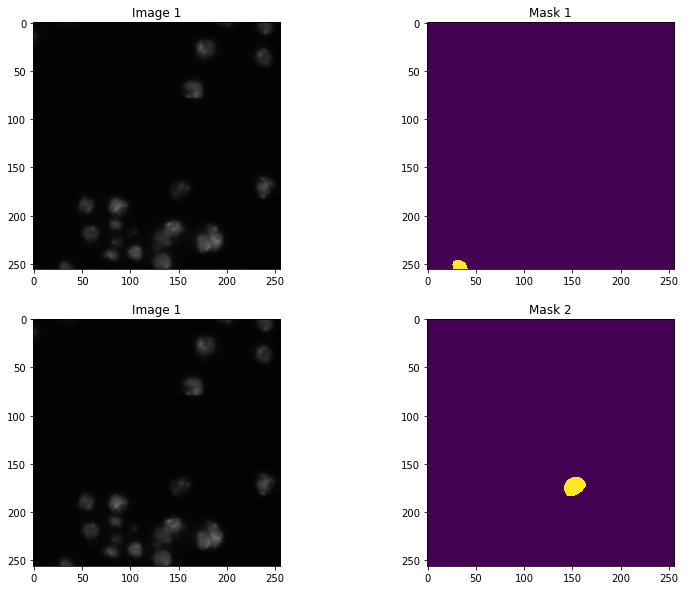

In [14]:
# Create a figure
plt.figure(figsize=(20, 10))

# Load one image and its mask
img = mpimg.imread('00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png')
mask = mpimg.imread('00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/0e548d0af63ab451616f082eb56bde13eb71f73dfda92a03fbe88ad42ebb4881.png')
mask2 = mpimg.imread('00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/0ea1f9e30124e4aef1407af239ff42fd6f5753c09b4c5cac5d08023c328d7f05.png')


# Plot the image and its mask
ax = plt.subplot(231)
ax.set_title("Image 1")
imgplot = plt.imshow(img)
ax1 = plt.subplot(232)
ax1.set_title("Mask 1")
maskplot = plt.imshow(mask)
ax2 = plt.subplot(234)
ax2.set_title("Image 1")
img2plot = plt.imshow(img)
ax3 = plt.subplot(235)
ax3.set_title("Mask 2")
mask2plot = plt.imshow(mask2)

plt.show()

### Now let us build a RLE decode function
The above function requires improvement, feel free to change it.

In [15]:
# decode mask function
def mask_decoder(rle, shapesrci):
    """
    Input
    rle:        Is a string with the "pixel location" "number of pixels" pair
                separated by spaces
    
    shapesrci:   Is the shape of the source image from where this mask was taken
    
    Output
    return: A numpy representation of the mask
    """ 

    # Create a cursor to modify flatten array
    position = rle[::2]
    displace = rle[::-2]
    cursor = dict(zip(position,reversed(displace)))


    # Create a 1d numpy flate array of zeros the size of the mask source image
    mask_img = np.zeros(shapesrci[1] * shapesrci[1])

    # Replace the 1d zeros by the rle using using the cursor
    for key in cursor:
        rset = range(int(key),int(key)  + int(cursor[key]))
        np.put(mask_img, rset, 1)
    
    # Reshape the 1d array into a 2d array.
    mask_img2d = np.reshape(mask_img,(shapesrci[0],shapesrci[0]))
    
    # Arrange the new array to compensate for the flattening
    
    # rotate image
    h,w = mask_img2d.shape[:2]
    M = cv2.getRotationMatrix2D((w/2,h/2),90,1.0)
    dst = cv2.warpAffine(mask_img2d,M,(w,h))
    
    # Flip it
    dst = horizontal_img = cv2.flip( dst, 0 )

    return dst

### Let us test the above function
It is important to run the first cell because you read the images used in the below test in that cell.

Run Length Image Representation Mask 1


'6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440 9 8696 9 8952 9 9209 8 9465 8 9722 7 9978 7 10235 6 10493 4 10752 1'

Run Length Image Representation Mask 2


'36269 7 36523 11 36778 13 37033 15 37288 17 37543 18 37799 18 38054 19 38310 19 38565 20 38821 20 39077 20 39333 19 39589 19 39845 18 40101 18 40357 17 40614 15 40870 15 41127 13 41384 10 41641 8 41899 4'

Mask 1 and Decoded ELR are equal?: False
Mask 2 and Decoded ELR are equal?: False


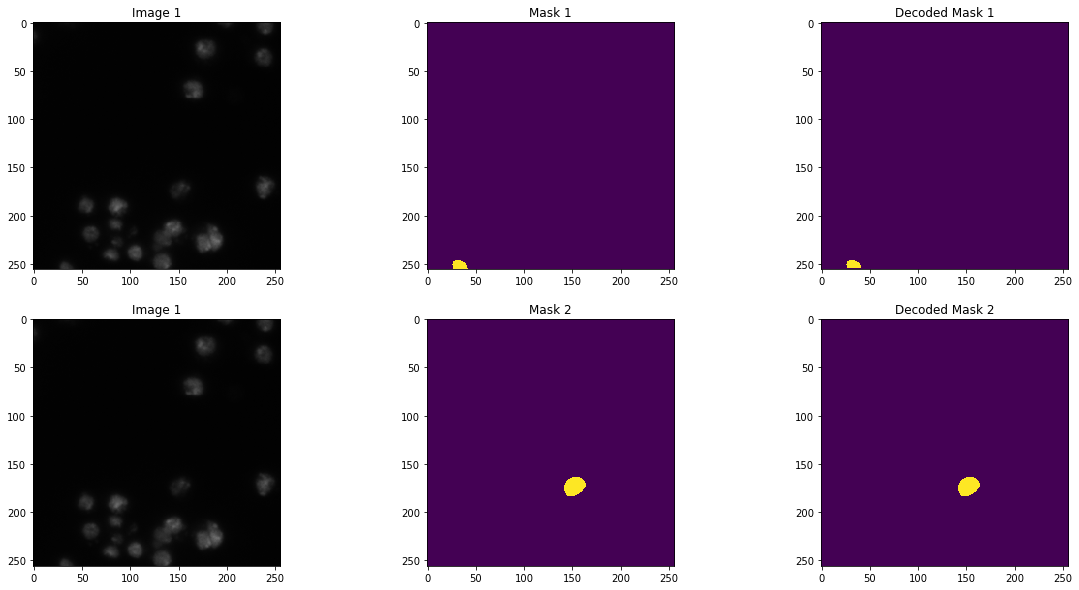

In [18]:

#### BELOW HERE IS JUST AN EXAMPLE OF USING THE FUCTION ABOVE ####

# Load mask csv file into a pandas dataframe
labels = pd.read_csv('stage1_train_labels.csv')
imgencodedpix = labels.loc[labels['ImageId'] == '00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552']

# Select one two rows, in our example the row 1" and row "2"
print("Run Length Image Representation Mask 1")
i,p = imgencodedpix.loc[0]
display(p)
print("Run Length Image Representation Mask 2")
i2,p2 = imgencodedpix.loc[1]
display(p2)

# Convert the csv rows to python list
rle = p.split(' ')
rle2 = p2.split(' ')

# Collect the shape of the source image of the masks
shapesrci = img.shape
# Called the decode function in the previous cell passing the two parameters
dst = mask_decoder(rle, shapesrci)
dst2 = mask_decoder(rle2, shapesrci)

# Plot the origial image the mask and the decoded mask
plt.figure(figsize=(20, 10))

# First column first row of the figure is the source image
ax = plt.subplot(231)
ax.set_title("Image 1")
imgplot = plt.imshow(img)

# Second column first row of the grid is the mask 1
ax1 = plt.subplot(232)
ax1.set_title("Mask 1")
maskplot = plt.imshow(mask)

# Third column first row in the decoded mask 1
ax4 = plt.subplot(233)
ax4.set_title("Decoded Mask 1")
mask_img2dplot = plt.imshow(dst)

# First column second row repeats the original image
ax2 = plt.subplot(234)
ax2.set_title("Image 1")
img2plot = plt.imshow(img)

# Second column second row is the mask 2
ax3 = plt.subplot(235)
ax3.set_title("Mask 2")
maskplot = plt.imshow(mask2)

# Third column second row is the decoded mask 2
ax5 = plt.subplot(236)
ax5.set_title("Decoded Mask 2")
mask2_img2dplot = plt.imshow(dst2)



print("Mask 1 and Decoded ELR are equal?: {}".format(np.array_equal(mask,dst)))
print("Mask 2 and Decoded ELR are equal?: {}".format(np.array_equal(mask,dst2)))



plt.show()

# Indexing the images

We need to find a way to index the images and their masks so we can easily manipulate them without duplicating them or changing their name.
We will use a pandas data frame to read the images names, their paths in the OS to their files and their path to the masks. 
The pandas dataframe is like an execel spreadsheet and it has its internal index that can be used to label the images in case we do not want to use the full image names.

Also once we index the image once we want to save the pandas dataframe so in the future we do not reindex them but just load the saved dataframe.

Finally if we add images we can delete the saves data frame and that will make the function to re-create it with the new images.


In [19]:
# First we create a structure to start the location of all the images
images_path = []
images_name = []
images_ndim = []
images_masks = []
separator = ','

# Capture Images Data
def load_images():
    
    if not os.path.isfile('training_images.pckl'):
        
        print("Data has not been loaded, load it")
        
        # Create file
        file = open('training_images.pckl', 'w').close()
        
        for path in glob.glob("*/images/*.png"):
            images_path.append(path)
            images_name.append(path.split('/',3)[2])
            images_ndim.append(cv2.imread(path).shape)
            images_masks.append(glob.glob(path.split('/',3)[0]+'/masks/*.png'))           
      
        d = {'Image_Name': images_name,
             'Image_Path': images_path,
             'Image_ndim': images_ndim,
             'Image_masks': images_masks}

        training_images = pd.DataFrame(data=d)
    
        # Save the dataframe in a pickle file
        with open('training_images.pckl', 'wb') as fh:
            pickle.dump(training_images,fh)
    else:
        
        print("Data will be loaded from the pickel file")
        training_images = pickle.load(open( 'training_images.pckl', 'rb' ) )
        
    
    return training_images



### BELOW HERE IS AN EXAMPLE OF HOW TO USE THE FUNCTION ###

# Load image metadata
training_images = load_images()

# Print a sample of the training_images dataframe
display(training_images.head(5))

# Get general information about the images
print("Number of images: {}".format(len(training_images['Image_Name'])))
print("Sizes of the images\n")
s = '\n'
print(s.join(str(x) for x in list(training_images['Image_ndim'].unique())))
print('\n')
avg_width = int(np.mean([ndim[0] for ndim in training_images['Image_ndim'].unique()]))
print("Average image size width: {}".format(avg_width))
avg_high = int(np.mean([ndim[1] for ndim in training_images['Image_ndim'].unique()]))
print("Average image size high: {}\n".format(avg_high))

Data will be loaded from the pickel file


,Image_Name,Image_Path,Image_masks,Image_ndim
0,573e1480b500c395f8d3f1800e1998bf553af0d3d43039...,573e1480b500c395f8d3f1800e1998bf553af0d3d43039...,[573e1480b500c395f8d3f1800e1998bf553af0d3d4303...,"(256, 256, 3)"
1,4bf6a5ec42032bb8dbbb10d25fdc5211b2fe1ce44b6e57...,4bf6a5ec42032bb8dbbb10d25fdc5211b2fe1ce44b6e57...,[4bf6a5ec42032bb8dbbb10d25fdc5211b2fe1ce44b6e5...,"(256, 256, 3)"
2,3b75fc03a1d12b29bd2870eb1f6fdb44174dbd1118dfc1...,3b75fc03a1d12b29bd2870eb1f6fdb44174dbd1118dfc1...,[3b75fc03a1d12b29bd2870eb1f6fdb44174dbd1118dfc...,"(256, 256, 3)"
3,2e172afb1f43b359f1f0208da9386aefe97c0c1afe202a...,2e172afb1f43b359f1f0208da9386aefe97c0c1afe202a...,[2e172afb1f43b359f1f0208da9386aefe97c0c1afe202...,"(256, 256, 3)"
4,a90401357d50e1376354ae6e5f56a2e4dff3fdb5a4e8d5...,a90401357d50e1376354ae6e5f56a2e4dff3fdb5a4e8d5...,[a90401357d50e1376354ae6e5f56a2e4dff3fdb5a4e8d...,"(256, 320, 3)"


Number of images: 670
Sizes of the images

(256, 256, 3)
(256, 320, 3)
(360, 360, 3)
(520, 696, 3)
(512, 640, 3)
(1024, 1024, 3)
(260, 347, 3)
(603, 1272, 3)
(1040, 1388, 3)


Average image size width: 536
Average image size high: 700



### Normalization

Images need to be normalized before training the network, this means standarize its size, pre-process them.
Below add cell with any function your think will help to prepare the images to feed them into the network.

In [21]:
# Rescale the image and transform it to greyscale function
# it returns two images one is a PIL image the 
def path_to_image(img_path):
    
    """
    
    img_path:  Path to an image file
    
    Return:
    img:       reshape greyscale PIL.Image.Image object 2d array
    img_cv2:   reshape 2d array no gray 
    
    """
    # loads RGB image as PIL.Image.Image type using the average size and grayscaling it
    img = image.load_img(img_path, grayscale=True, target_size=(536, 700))
    # Load image and resize using opencv in case you need a different format
    img_cv2 = cv2.resize(cv2.imread(img_path), (700,536), interpolation = cv2.INTER_AREA)
    return img,img_cv2

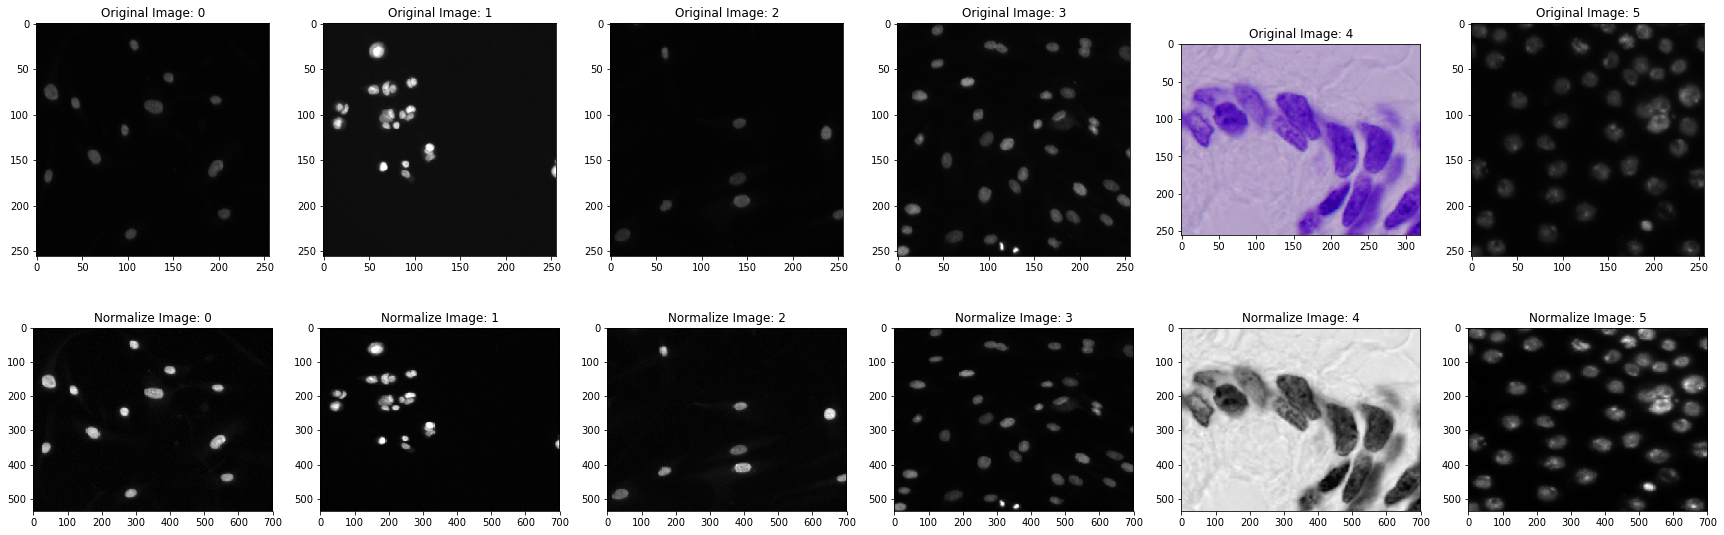

First 5 normalize masks of the image 573e1480b500c395f8d3f1800e1998bf553af0d3d43039333d33cf37d08f64e5.png


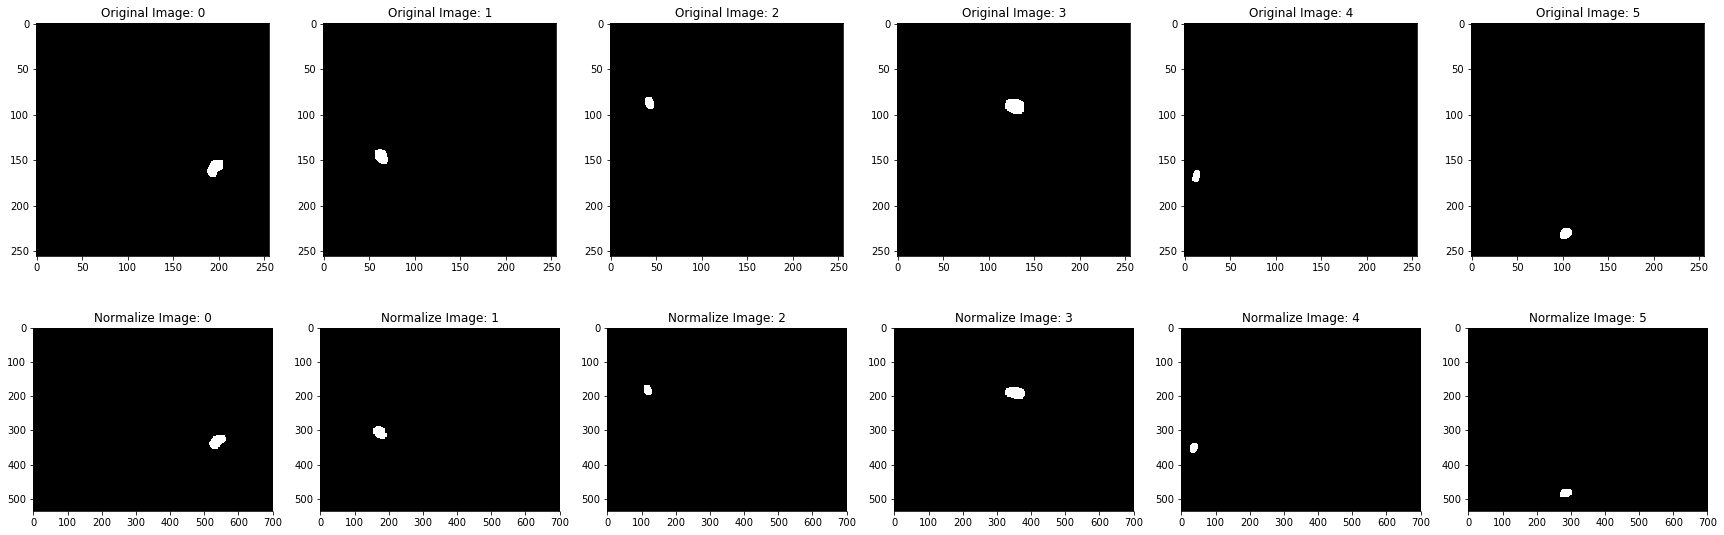

In [22]:
### BELOW EXAMPLE OF HOW TO USE THE ABOVE FUNCTION ###

# Let us test the tranformation
def plot_norm_images(_from, _to,images):
    
    """
    
    _from:  Pandas series start pointer
    _to:    Pandas series end pointer
    images: Pandas data series with path to images
    
    """
    plt.figure(figsize=(30,30))
    for ii,i in enumerate(images.loc[_from:_to]):
        axel_name = 'ax' + str(ii + 1)
        axel_name = plt.subplot2grid((6,6),
                                 (0,ii),colspan=1)
        axel_name.set_title("Original Image: " + str(ii))
        original_image = image.load_img(i)
        origimgplot = plt.imshow(original_image)
        axel_name2 = 'ax2' + str(ii + 1)
        axel_name2 = plt.subplot2grid((6,6),
                                  (1,ii))
        axel_name2.set_title("Normalize Image: " + str(ii))
        norm_image = path_to_image(i)[0]
        normimgplot = plt.imshow(norm_image, cmap = plt.cm.gray)

    plt.show()

plot_norm_images(0,5,training_images['Image_Path'])
#Let see how the mask looklike
print("First 5 normalize masks of the image {}".format(training_images['Image_Name'].loc[0]))
plot_norm_images(0,5,pd.Series(training_images['Image_masks'].loc[0]))



## Transfor image to Tensor

The following function convert the reshaped, greyscale image into a normalize tensor to be used by tensorflow.
Other functions can be code here to conver the image to a tensor that can be used with keras or cafe.

In [23]:
#Normalize the image pixels between 1 and -1 in prepartion
# to feed it to tensorflow
def tf_preprocess_image(img):
    
    """
    
    img:    3D or 4D image representation greyscale image
    tf_img: Tensor standarized for tensorflow
    
    """
    tf_img = tf.image.per_image_standardization(img)
    return tf_img

Normalize image size: (700, 536)
Tensor image shape: (536, 700, 1)


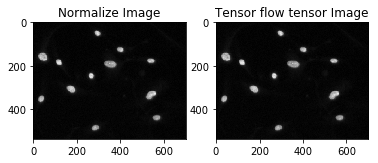

In [24]:
### BELOW EXAMPLE CODE TO USE THE ABOVE FUNCTION ###

# Test the normalization to tensor 

i = training_images['Image_Path'].loc[0]
img = path_to_image(i)[0]
tensor = tf_preprocess_image(np.array(img.getdata(),
                np.uint8).reshape(img.size[1], img.size[0], 1))

# Access the tensor to get its information

with tf.Session() as sess:
    out = sess.run(tensor)

# Print the shape of the normalize image and the tensor

print("Normalize image size: {}".format(img.size))
print("Tensor image shape: {}".format(out.shape))


# Plot both the tensor and the image to check if they are the same
ax1 = plt.subplot(121)
ax1.set_title("Normalize Image")
plt.imshow(img,cmap = plt.cm.gray)
ax2 = plt.subplot(122)
ax2.set_title("Tensor flow tensor Image")
plt.imshow(out.reshape(out.shape[0],out.shape[1]),cmap = plt.cm.gray)
plt.show()
   

# Histogram Approach
As per the agreement our group would investigate the histogram approach. The idea is to see if applying fourier transformation to the histogram of image reveals information about the objects in the image.

After some research I found that method to extract features and to perform segmentation from images using the image histogram based features extraction like HOG or SPACE/FREQUENCY analysis, etc are less efficient that using methods based on Neural Networks. It sounds logical to pursue the NN approach instead of more traditional approaches

# Finding the missing masks

This function is not useful, it maybe transform to help with the mask merge function but as it is does not due anything.

By using the dataframe as the indexing structure of the images and their mask blend all the masks with its image to see which ones are missing or overlay.

Image name: 573e1480b500c395f8d3f1800e1998bf553af0d3d43039333d33cf37d08f64e5


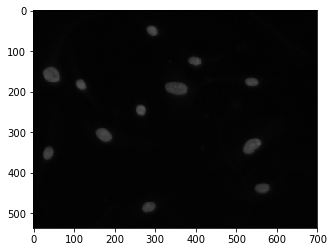

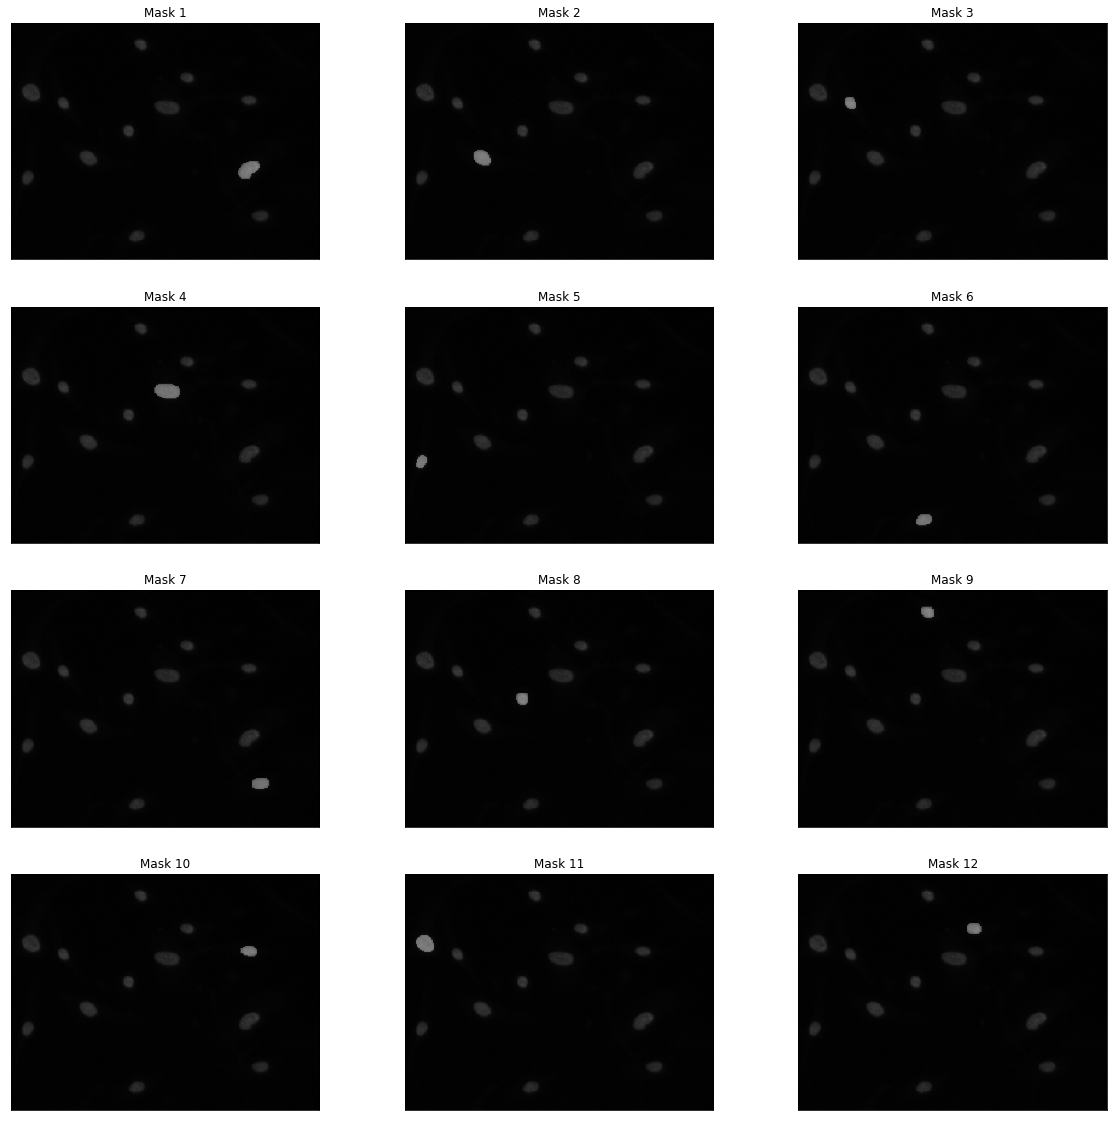

Image name: a90401357d50e1376354ae6e5f56a2e4dff3fdb5a4e8d50316673b2b8f1f293b


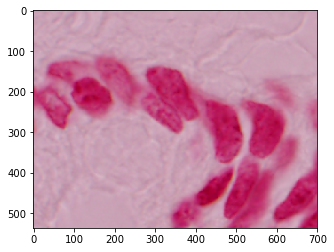

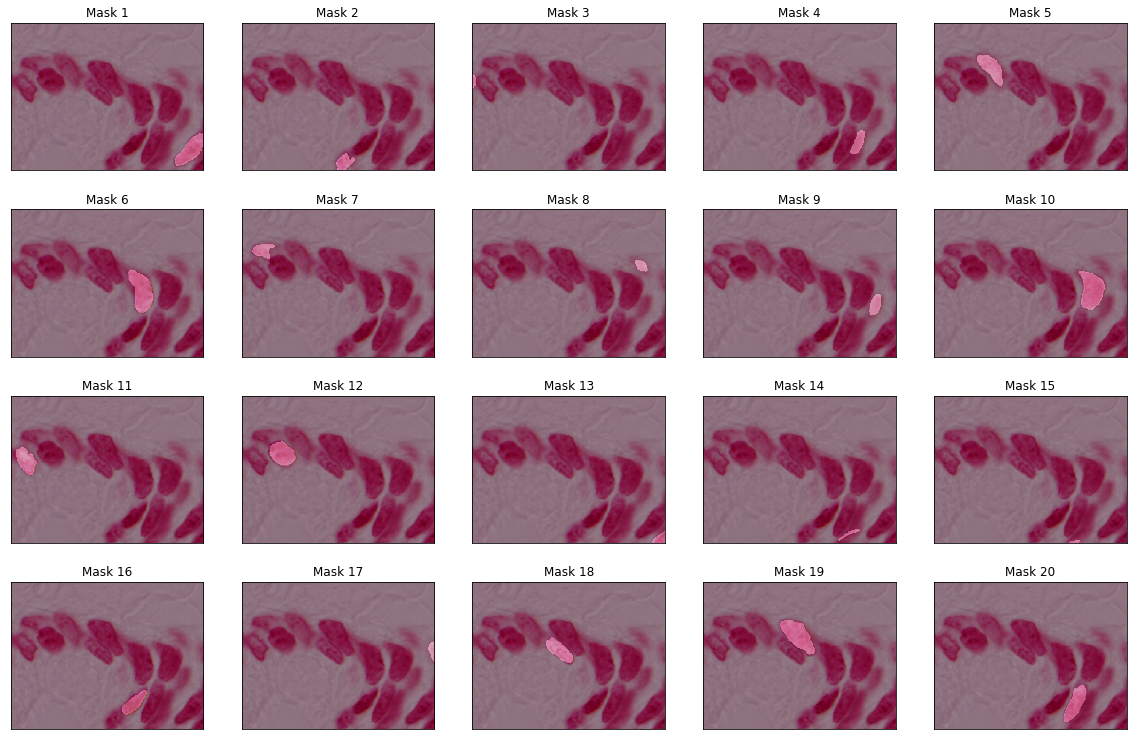

Image name: 0ddd8deaf1696db68b00c600601c6a74a0502caaf274222c8367bdc31458ae7e


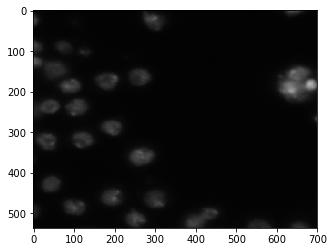

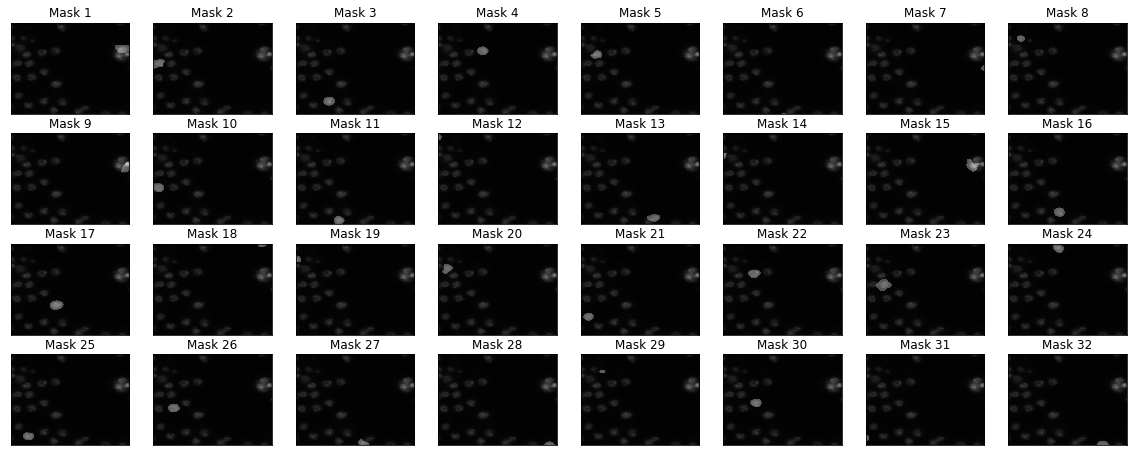

In [25]:
def overlay_masks(img_path):
    """
    
    img_path:   Path to an image
    
    """ 
    
    print("Image name: {}".format(img_path.split('/')[0]))
    img = path_to_image(img_path)[1]
    plt.imshow(img)

    masks_list = []
    
    # Create a list with all the image masks 
    for m in training_images.loc[training_images['Image_Path'] == img_path]['Image_masks'].values[0]:
        masks_list.append(path_to_image(m)[1])
 
    # Blend one image as an example
    fig = plt.figure(figsize=(20, 20))
    for i in range(len(masks_list)):
        ax = fig.add_subplot(int(len(masks_list)/3),int(len(masks_list)/4),i+1, xticks=[], yticks=[])
        mask = cv2.addWeighted(img,0.7,masks_list[i],0.3,0)
        ax.imshow(mask, cmap='gray')
        ax.set_title('Mask %s' % str(i+1))
    plt.show()

# Plot three samples
for i in [0,4,10]:
    overlay_masks(training_images['Image_Path'].loc[i])



# Implement the tensorflow unet

We create are trainin, validation, test sets

In [27]:
# Create a training a validation set

# Training set is 80% of the images and 20% left for test
training_set = training_images.sample(frac=0.80)
validation_set = training_images.copy()
validation_set = validation_set.drop(training_images.index[[list(training_set.index)]])

print("Total number of images: {}".format(len(training_images)))
print("Training set images: {}".format(len(training_set)))
print("Validations set images: {}".format(len(validation_set)))



Total number of images: 670
Training set images: 536
Validations set images: 134


 We create a generation function to create batches of images to be passed to the NN

In [ ]:
# Generation function

Image number of channels: 1
Image number of classes: 2


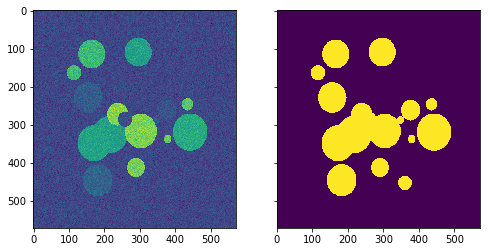

2018-02-17 16:07:31,373 Layers 3, features 16, filter size 3x3, pool size: 2x2
2018-02-17 16:07:32,617 Removing '/home/gaure/Google_Drive/kaggle/training_set/prediction'
2018-02-17 16:07:32,619 Removing '/home/gaure/Google_Drive/kaggle/training_set/unet_trained'
2018-02-17 16:07:32,621 Allocating '/home/gaure/Google_Drive/kaggle/training_set/prediction'
2018-02-17 16:07:32,622 Allocating '/home/gaure/Google_Drive/kaggle/training_set/unet_trained'
2018-02-17 16:07:41,767 Verification error= 83.5%, loss= 0.7072
2018-02-17 16:07:42,321 Start optimization
2018-02-17 16:07:48,294 Iter 0, Minibatch Loss= 0.6395, Training Accuracy= 0.8167, Minibatch error= 18.3%
2018-02-17 16:07:58,392 Iter 2, Minibatch Loss= 0.5702, Training Accuracy= 0.8477, Minibatch error= 15.2%
2018-02-17 16:08:08,429 Iter 4, Minibatch Loss= 0.5543, Training Accuracy= 0.8008, Minibatch error= 19.9%
2018-02-17 16:08:18,505 Iter 6, Minibatch Loss= 0.5236, Training Accuracy= 0.8062, Minibatch error= 19.4%
2018-02-17 16:08:2

In [29]:
from __future__ import division, print_function
from tf_unet import unet, util, image_util, image_gen


nx = 572
ny = 572

# Create a random image generator
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)
    

print("Image number of channels: {}".format(generator.channels))
print("Image number of classes: {}".format(generator.n_class))

x_test, y_test = generator(1)
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

plt.show()

# Generate the UNET network
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

# configure trainer optimizer
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

# Trained
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=10, display_step=2)


### Every epoch the network executes a test on four images, to test the accurary. You can see the network knows when two circles are overlap. If you see first road third column image is the prediction, one of the circle is not completed but you can see is not part of the circle above; this seems greate we may not need to use two separate networks. 

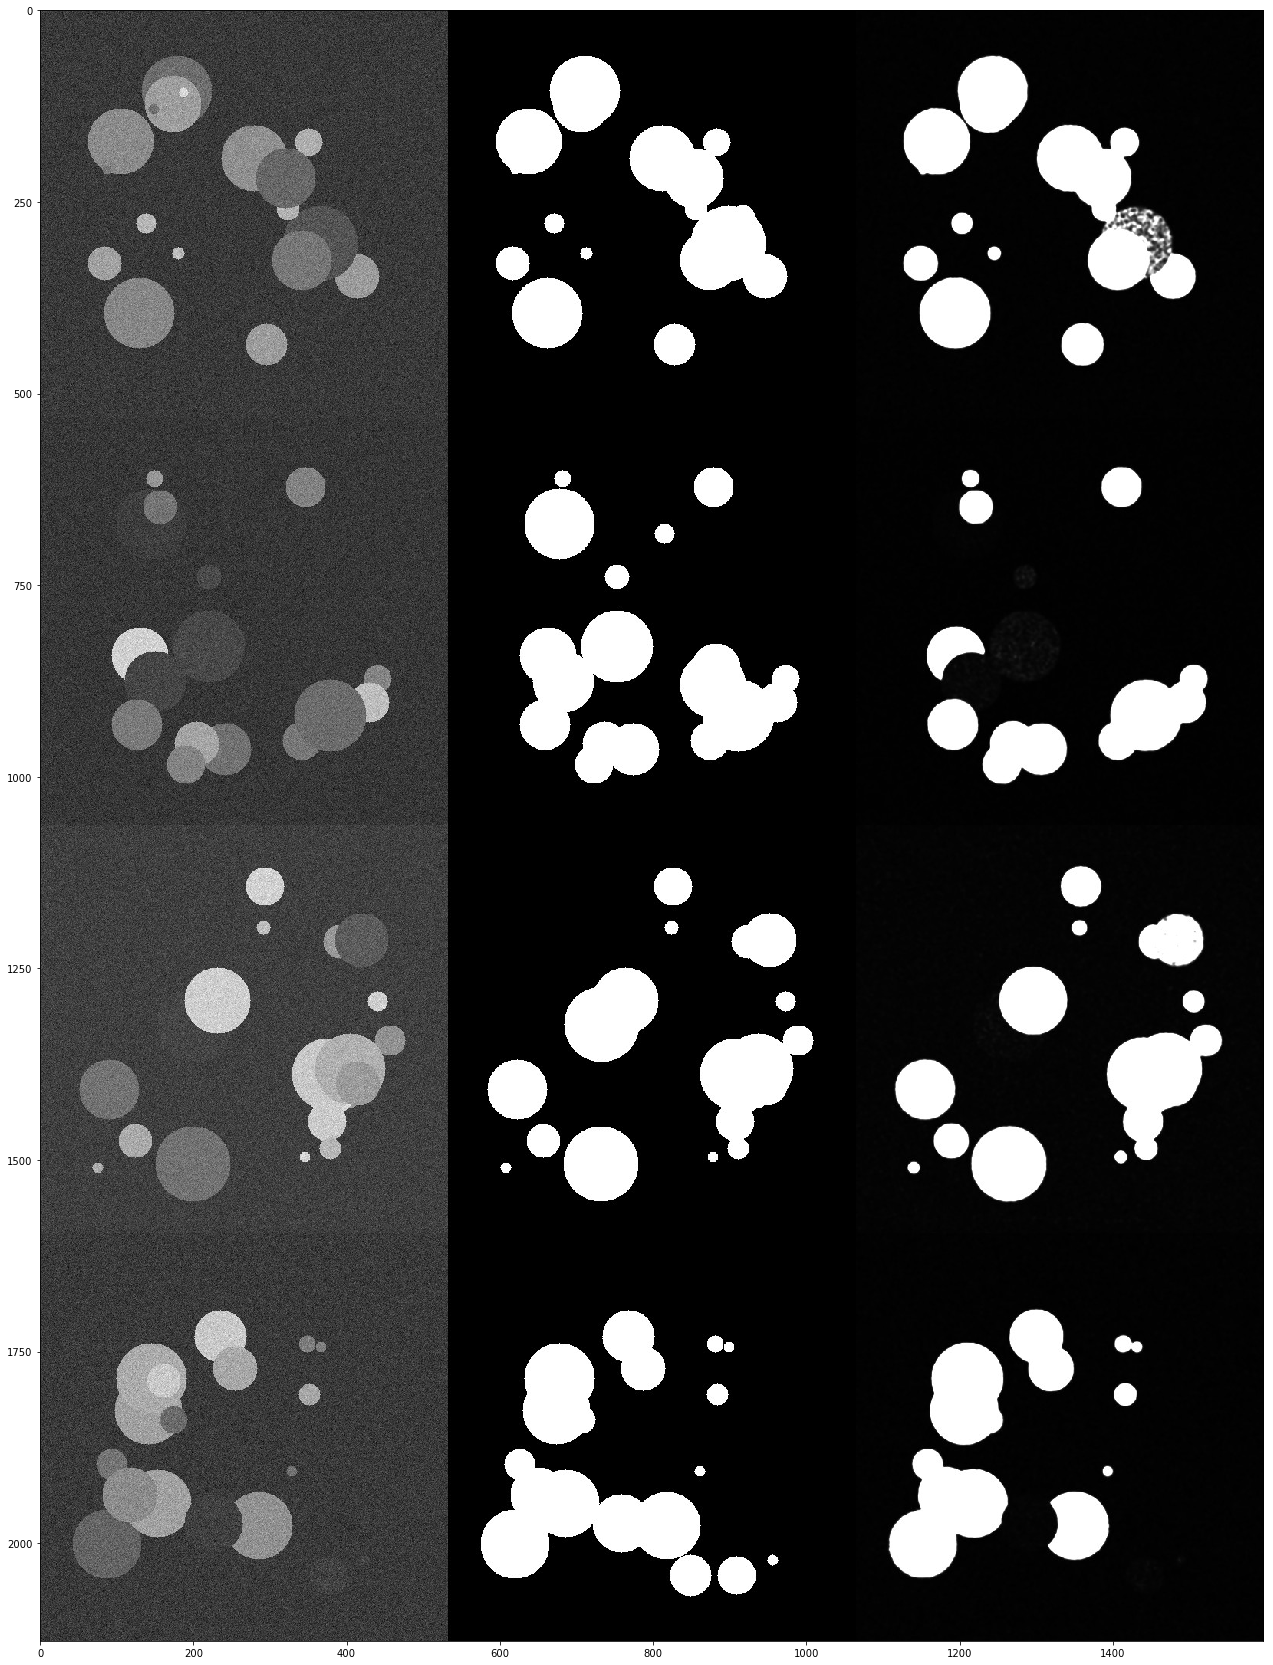

In [37]:
# Load the epoch 9 prediction
plt.figure(figsize=(30,30))
pred = mpimg.imread('/home/gaure/Google_Drive/kaggle/training_set/prediction/epoch_9.jpg')
predimg = plt.imshow(pred)
plt.show()